In [42]:
import numpy as np
from pyGPGO.covfunc import squaredExponential
from pyGPGO.acquisition import Acquisition
from pyGPGO.surrogates.GaussianProcess import GaussianProcess
from pyGPGO.GPGO import GPGO
import pandas as pd
%matplotlib inline

def f(x):
    return np.sin(x)

# acquisition functions
acq_functions = ['ExpectedImprovement', 'ProbabilityImprovement', 'UCB']
    
def hyp_tuning(acq, f):
    sexp = squaredExponential()
    gp = GaussianProcess(sexp)
    acq = Acquisition(mode=acq)
    #param = {'max_zoom': ('cont', [1, 10]), 
    #     'lr': ('cont', [0, 10]),
    #     'epochs':('int', [1, 20]),
    #     'cycle_len':('int', [1, 20]),
    #     'cycle_mult':('int', [1, 20])}
    param = {'x': ('cont', [0, 2 * np.pi])}

    np.random.seed(23)
    gpgo = GPGO(gp, acq, f, param)
    gpgo.run(max_iter=20)
    output = gpgo.getResult()
    history = gpgo.history
    return ([output, history]) 
    # add the plotting here
    
df = pd.DataFrame(columns=acq_functions, dtype=float)    
for i in acq_functions:
    print(i)
    df[i] = hyp_tuning(i, f)[1]
    
    

ExpectedImprovement
Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 3.25027846]. 	  -0.1084719588823907 	 -0.1084719588823907
init   	 [ 5.94994152]. 	  -0.32711007941725473 	 -0.1084719588823907
init   	 [ 4.80952551]. 	  -0.9952859553348876 	 -0.1084719588823907
1      	 [ 1.58178017]. 	  0.999939678175 	 0.999939678175
2      	 [ 0.66932349]. 	  0.620455578287 	 0.999939678175
3      	 [ 2.06732052]. 	  0.879243645882 	 0.999939678175
4      	 [ 0.]. 	  0.0    	 0.999939678175
5      	 [ 1.44115569]. 	  0.991608415302 	 0.999939678175
6      	 [ 1.57443619]. 	  0.999993375716 	 0.999993375716
7      	 [ 1.57340504]. 	  0.999996597311 	 0.999996597311
8      	 [ 1.57298701]. 	  0.999997600453 	 0.999997600453
9      	 [ 1.57277291]. 	  0.999998046565 	 0.999998046565
10     	 [ 1.57264269]. 	  0.999998295467 	 0.999998295467
11     	 [ 1.57254961]. 	  0.999998463008 	 0.999998463008
12     	 [ 1.57248409]. 	  0.999998575728 	 0.999998575728
13     	 [ 1.57243403]

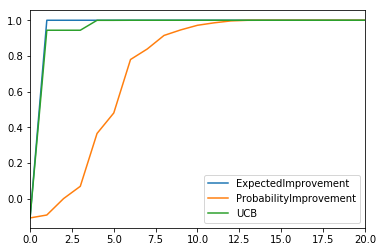

In [43]:
# plotting
df.plot()

In [2]:
# Compare performance of Bayes_Opt vs RandomSearch



100000.0

1.0